In [65]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from matplotlib import dates
from matplotlib.dates import DateFormatter
from matplotlib.ticker import MaxNLocator
from sqlalchemy import inspect
from scipy import stats

In [66]:
import numpy as np
import pandas as pd

In [67]:
import datetime as dt
from datetime import datetime
from datetime import date, timedelta

# Reflect Tables into SQLAlchemy ORM

In [68]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [69]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [70]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine,reflect=True)
Base

sqlalchemy.ext.automap.Base

In [71]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [72]:
# Save references to each table
measurement = engine.execute('select * from measurement').fetchall()
print(measurement[:10])

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0), (2, 'USC00519397', '2010-01-02', 0.0, 63.0), (3, 'USC00519397', '2010-01-03', 0.0, 74.0), (4, 'USC00519397', '2010-01-04', 0.0, 76.0), (5, 'USC00519397', '2010-01-06', None, 73.0), (6, 'USC00519397', '2010-01-07', 0.06, 70.0), (7, 'USC00519397', '2010-01-08', 0.0, 64.0), (8, 'USC00519397', '2010-01-09', 0.0, 68.0), (9, 'USC00519397', '2010-01-10', 0.0, 73.0), (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]


In [73]:
station = engine.execute('select * from station').fetchall()
print(station[:10])

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0), (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6), (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0), (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9), (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6), (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5), (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9), (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9), (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]


In [74]:
measurement = Base.classes.measurement
station = Base.classes.station

In [75]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [76]:
# Verify measurement class
first_station = session.query(station).first()
first_station.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fc6baab19d0>,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'station': 'USC00519397',
 'longitude': -157.8168,
 'elevation': 3.0,
 'latitude': 21.2716}

In [77]:
first_measurement = session.query(measurement).first()
first_measurement.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fc6ba430250>,
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397'}

# Exploratory Climate Analysis

In [78]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
max_d = session.query(measurement.date).order_by(measurement.date.desc()).first()[0]
max_d = datetime.strptime(max_d, '%Y-%m-%d')
max_d 

datetime.datetime(2017, 8, 23, 0, 0)

In [79]:
# Calculate the date 1 year ago from the last data point in the database
last_year = max_d -timedelta(days=366)
last_year

datetime.datetime(2016, 8, 22, 0, 0)

In [80]:
# Perform a query to retrieve the data and precipitation scores
measurement_year = session.query(measurement.prcp, measurement.date).filter(measurement.date>=last_year).all()
measurement_year

[(0.0, '2016-08-23'),
 (0.08, '2016-08-24'),
 (0.08, '2016-08-25'),
 (0.0, '2016-08-26'),
 (0.0, '2016-08-27'),
 (0.01, '2016-08-28'),
 (0.0, '2016-08-29'),
 (0.0, '2016-08-30'),
 (0.13, '2016-08-31'),
 (0.0, '2016-09-01'),
 (0.0, '2016-09-02'),
 (0.0, '2016-09-03'),
 (0.03, '2016-09-04'),
 (None, '2016-09-05'),
 (None, '2016-09-06'),
 (0.05, '2016-09-07'),
 (0.0, '2016-09-08'),
 (0.03, '2016-09-09'),
 (0.0, '2016-09-10'),
 (0.05, '2016-09-11'),
 (0.0, '2016-09-12'),
 (0.02, '2016-09-13'),
 (1.32, '2016-09-14'),
 (0.42, '2016-09-15'),
 (0.06, '2016-09-16'),
 (0.05, '2016-09-17'),
 (0.0, '2016-09-18'),
 (0.0, '2016-09-19'),
 (0.0, '2016-09-20'),
 (0.0, '2016-09-21'),
 (0.02, '2016-09-22'),
 (0.0, '2016-09-23'),
 (0.0, '2016-09-24'),
 (0.0, '2016-09-25'),
 (0.06, '2016-09-26'),
 (0.02, '2016-09-27'),
 (0.0, '2016-09-28'),
 (0.0, '2016-09-29'),
 (0.0, '2016-09-30'),
 (0.0, '2016-10-01'),
 (0.0, '2016-10-02'),
 (0.0, '2016-10-03'),
 (0.0, '2016-10-04'),
 (0.0, '2016-10-05'),
 (0.0, '2016-1

In [81]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(measurement_year,columns=['Precipitation', 'Dates'])
df.set_index(['Dates'], inplace=True)
# Sort the dataframe by date
df.sort_index(inplace=True)
df=df.dropna()
df

,Precipitation
Dates,
2016-08-23,0.00
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
2016-08-23,0.70
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


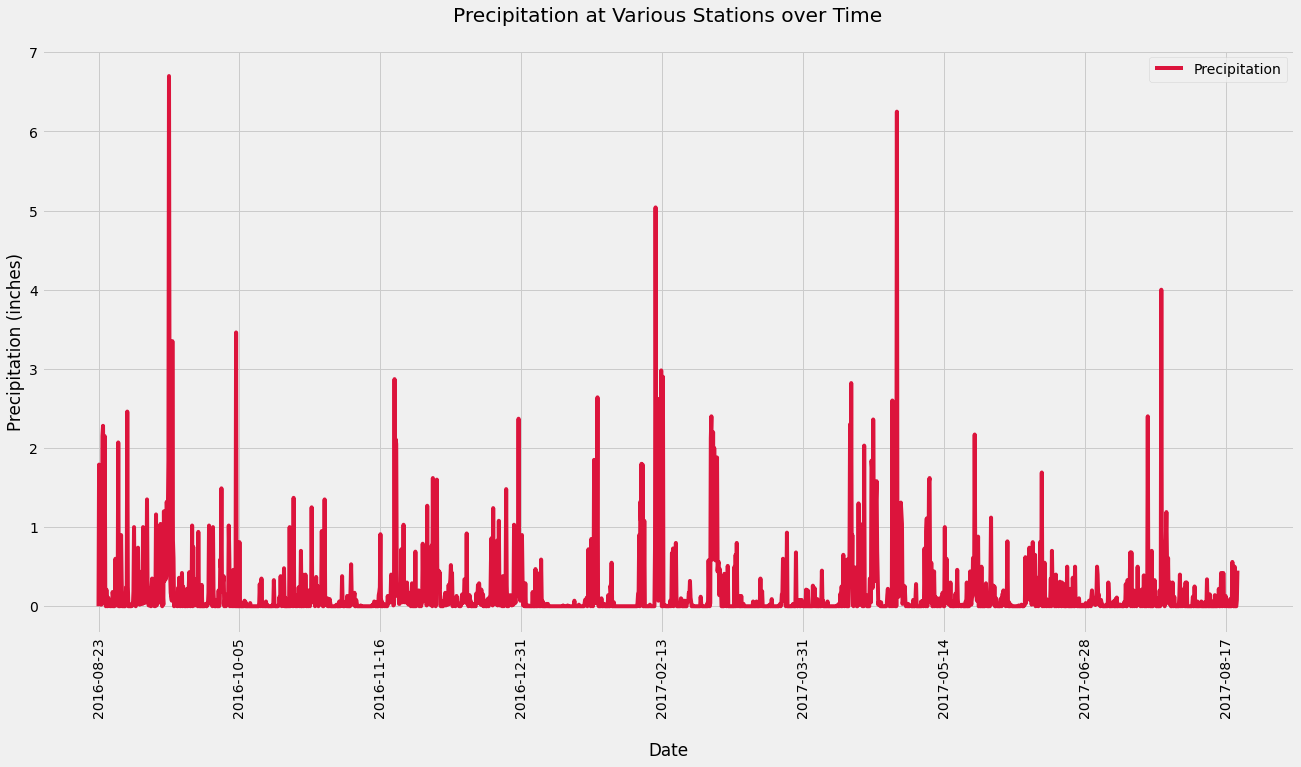

In [82]:
# Use Pandas Plotting with Matplotlib to plot the data
fig, ax= plt.subplots(figsize = (20, 10))
df.plot(ax = ax, color = 'crimson')
ax.set_title('Precipitation at Various Stations over Time\n')
ax.set_ylabel('Precipitation (inches)')
ax.set_xlabel('\nDate')
plt.xticks(rotation=90)
plt.savefig('Images/Image1.png',bbox_inches = 'tight')
plt.show()

In [83]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [84]:
# Design a query to show how many stations are available in this dataset?
n_station = session.query(station.station).count()
n_station

9

In [85]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
ma_station = session.query(measurement.station,func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()

In [86]:
# Stations and the counts in descending order.
for n_station in ma_station:
    print(f'Station: {n_station[0]}  Count: {n_station[1]}')

Station: USC00519281  Count: 2772
Station: USC00519397  Count: 2724
Station: USC00513117  Count: 2709
Station: USC00519523  Count: 2669
Station: USC00516128  Count: 2612
Station: USC00514830  Count: 2202
Station: USC00511918  Count: 1979
Station: USC00517948  Count: 1372
Station: USC00518838  Count: 511


In [87]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
# The most active station
b_station = ma_station[0][0]
print(f'Most active station: {b_station}')

Most active station: USC00519281


In [88]:
# Calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature
record_temps = session.query(func.min(measurement.tobs),func.max(measurement.tobs),func.avg(measurement.tobs)).filter(measurement.station == b_station).all()
# Print it
print(f"Lowest Temperature in station {b_station}: {record_temps[0][0]} \nHighest Temperature in station in station {b_station}: {b_station}: {record_temps[0][1]} \nAverage Temperature in station {b_station}: {round(record_temps[0][2],2)}")

Lowest Temperature in station USC00519281: 54.0 
Highest Temperature in station in station USC00519281: USC00519281: 85.0 
Average Temperature in station USC00519281: 71.66


In [89]:
# Choose the station with the highest number of temperature observations.
high_tempobs = session.query(measurement.station, func.count(measurement.tobs)).group_by(measurement.station).order_by(func.count(measurement.tobs).desc()).all()
high_tempobs_station = high_tempobs[0][0]

In [90]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
t_obs = session.query(measurement.tobs).filter(measurement.station == high_tempobs_station).filter(measurement.date >= last_year).order_by(measurement.date).all()

In [91]:
# 12 months of temperature observation DataFrme
tobs = pd.DataFrame(t_obs, columns = ['Temperature'])
tobs

,Temperature
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0
...,...
347,77.0
348,77.0
349,76.0
350,76.0


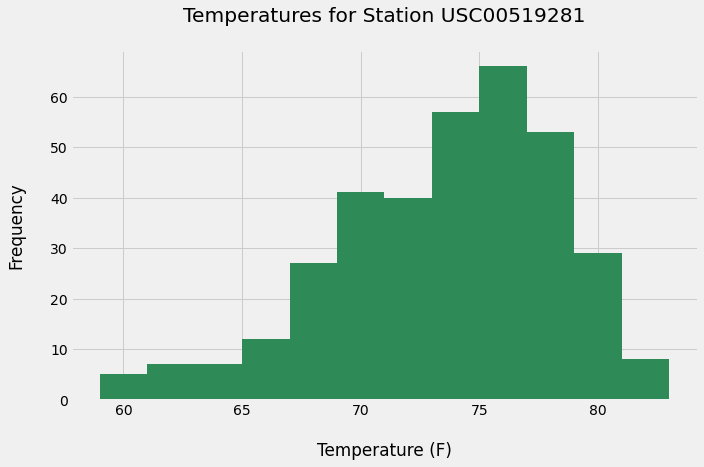

In [92]:
# Plot the results as a histogram with bins=12
fig, ax= plt.subplots(figsize = (10, 6))
plt.hist(tobs['Temperature'], bins = 12, color = 'seagreen')
ax.set_title(f'Temperatures for Station {b_station}\n')
ax.set_xlabel('\nTemperature (F)')
ax.set_ylabel('Frequency\n')
plt.savefig('Images/Temperatures_for_Station_USC00519281.png',bbox_inches = 'tight')
plt.show()

## Bonus Challenge Assignment

In [93]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)).\
        filter(measurement.date >= start_date).filter(measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [194]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
start_date = '2017-07-01'
end_date = '2017-07-14'

trip = calc_temps(start_date,end_date)
trip

[(69.0, 78.11627906976744, 87.0)]

In [195]:
# Dataframe with the calculated tmin, tavg, and tmax values
trip_df = pd.DataFrame(trip, columns=['Temperature Min (F)', 'Temperature Avg (F)', 'Temperature Max(F)'])
trip_df

,Temperature Min (F),Temperature Avg (F),Temperature Max(F)
0,69.0,78.116279,87.0


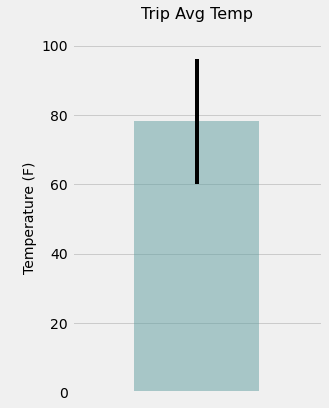

In [196]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
trip_df.plot.bar(y = 'Temperature Avg (F)', yerr = (trip_df['Temperature Max(F)'] - trip_df['Temperature Min (F)']), color = 'cadetblue', alpha=0.5, figsize=(4,6))
plt.xticks(np.arange(1,1.0))
plt.title('Trip Avg Temp\n', fontsize = 16)
plt.ylabel('\nTemperature (F)', fontsize = 14)
plt.gca().legend_.remove()
plt.savefig('Images/Trip Avg Temp.png',bbox_inches = 'tight')
plt.show()

In [197]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
start_date = '2017-07-01'
end_date = '2018-07-15'

sel = [measurement.station, 
        station.name, 
        station.latitude, 
        station.longitude, 
        station.elevation, 
        measurement.prcp]

# weather_station = [station.station, station.name, station.latitude, station.longitude, station.elevation, func.sum(measurement.prcp)]
result_weather = session.query(*sel).\
    filter(measurement.station == station.station).\
    filter(measurement.date >= start_date).\
    filter(measurement.date <= end_date).\
    group_by(station.name).order_by(func.sum(measurement.prcp).desc()).all()

results_weather_df = pd.DataFrame(result_weather, columns = ['Station','Station Name','Latitude','Longitude','Elevation','Total Rain Fall'])
results_weather_df

,Station,Station Name,Latitude,Longitude,Elevation,Total Rain Fall
0,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,0.10
1,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,0.08
2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,NaN
3,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,0.06
4,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,NaN
5,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,0.02
6,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9,NaN


In [198]:
# Identify the average temperature in June at all stations across all available years in the dataset. Do the same for December temperature.
avg_june = session.query(func.avg(measurement.tobs)).filter(func.strftime('%m', measurement.date) == '06').all()
avg_june = list(np.ravel(avg_june))[0]

# Identify the average temperature in December at all stations across all available years in the dataset.
avg_december = session.query(func.avg(measurement.tobs)).filter(func.strftime('%m', measurement.date) == '12').all()
avg_december = list(np.ravel(avg_december))[0]

print (f'The average temperature in June at all stations across all available years in the dataset is {round(avg_june,2)} (F)')
print (f'The average temperature in December at all stations across all available years in the dataset is {round(avg_december,2)} (F)')

The average temperature in June at all stations across all available years in the dataset is 74.94 (F)
The average temperature in December at all stations across all available years in the dataset is 71.04 (F)


In [199]:
# June
j_temp = session.query(measurement.tobs).filter(func.strftime("%m", measurement.date) == '06').all()

# December
d_temp = session.query(measurement.tobs).filter(func.strftime("%m", measurement.date) == '12').all()

In [223]:
# T Test
c = stats.ttest_ind(j_temp, d_temp, equal_var=False)
c = list(np.ravel(c))[1]
print (f'P-value using paired t-test is {c}. ')

P-value using paired t-test is 4.193529835915755e-187. 


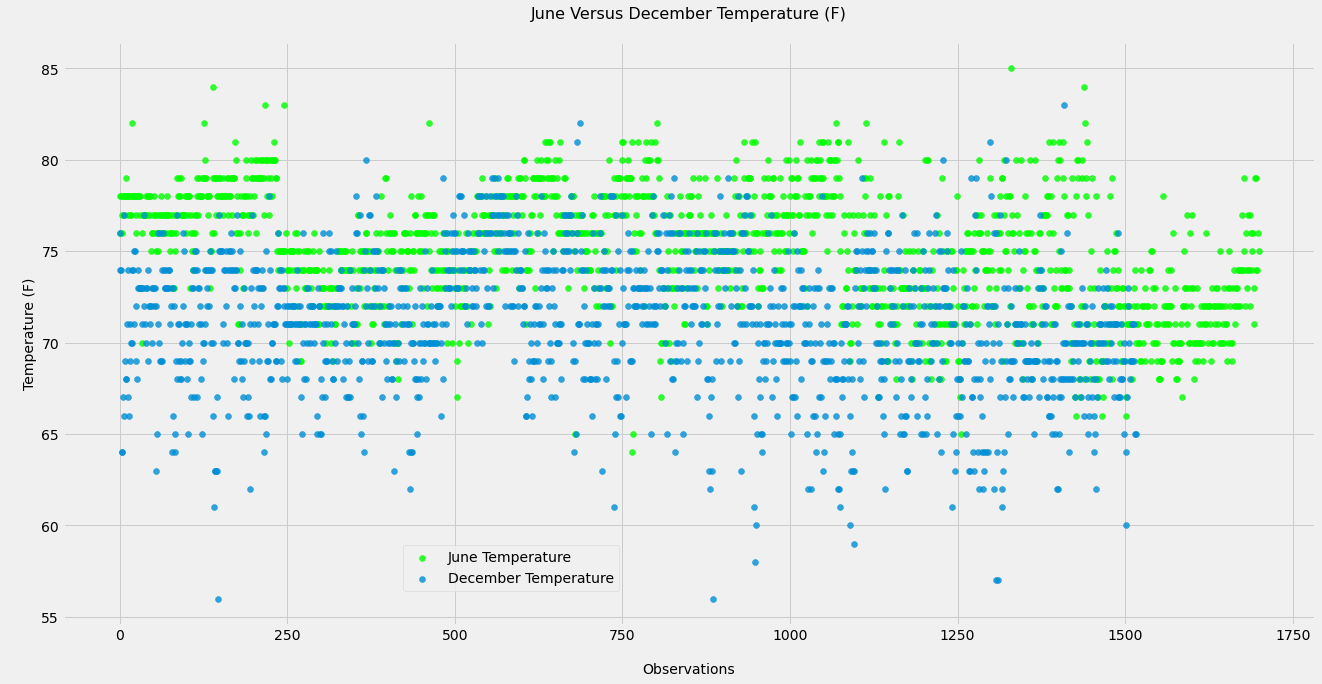

In [201]:
# Scatter plot of June and December data
fig, ax= plt.subplots(figsize = (20,10))
plt.scatter(range(len(j_temp)),j_temp, label = 'June Temperature', alpha = 0.8, color = 'lime')
plt.scatter(range(len(d_temp)),d_temp, label = 'December Temperature', alpha = 0.8)
plt.legend(bbox_to_anchor=(0.45,.15))
plt.title(f'June Versus December Temperature (F)\n', fontsize = 16)
plt.ylabel('\nTemperature (F)', fontsize = 14)
plt.xlabel('\nObservations', fontsize = 14)
plt.savefig('Images/June_vs_December_Scatter_Plot.png',bbox_inches = 'tight')
plt.show()

In [203]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [204]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`
normals = []

start_date = (dt.datetime.strptime('2017-07-01', "%Y-%m-%d")).date()
end_date = (dt.datetime.strptime('2017-07-14', "%Y-%m-%d")).date()
# Set the start and end date of the trip
trip_dates = []

# Use the start and end date to create a range of dates
# Stip off the year and save a list of %m-%d strings
current_date = start_date
while current_date <= end_date:
    month = current_date.strftime('%m')
    day = current_date.strftime('%d')
    trip_dates.append(f"{month}-{day}")
    current_date += dt.timedelta(days=1)

# Loop through the list of %m-%d strings and calculate the normals for each date
for i in range(len(trip_dates)):
    day_normal = daily_normals(trip_dates[i])
    normals.append(day_normal[0])

In [205]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
dailynormals_df = pd.DataFrame(normals, columns =['Temperature Min (F)', 'Temperature Avg (F)', 'Temperature Max(F)']) 
dailynormals_df["Date"] = trip_dates
dailynormals_df.set_index("Date")

,Temperature Min (F),Temperature Avg (F),Temperature Max(F)
Date,,,
07-01,67.0,74.777778,81.0
07-02,68.0,75.403846,82.0
07-03,68.0,75.320755,87.0
07-04,70.0,76.571429,81.0
07-05,66.0,75.000000,81.0
07-06,69.0,75.000000,81.0
07-07,69.0,74.910714,82.0
07-08,69.0,76.083333,83.0
07-09,68.0,76.192982,83.0


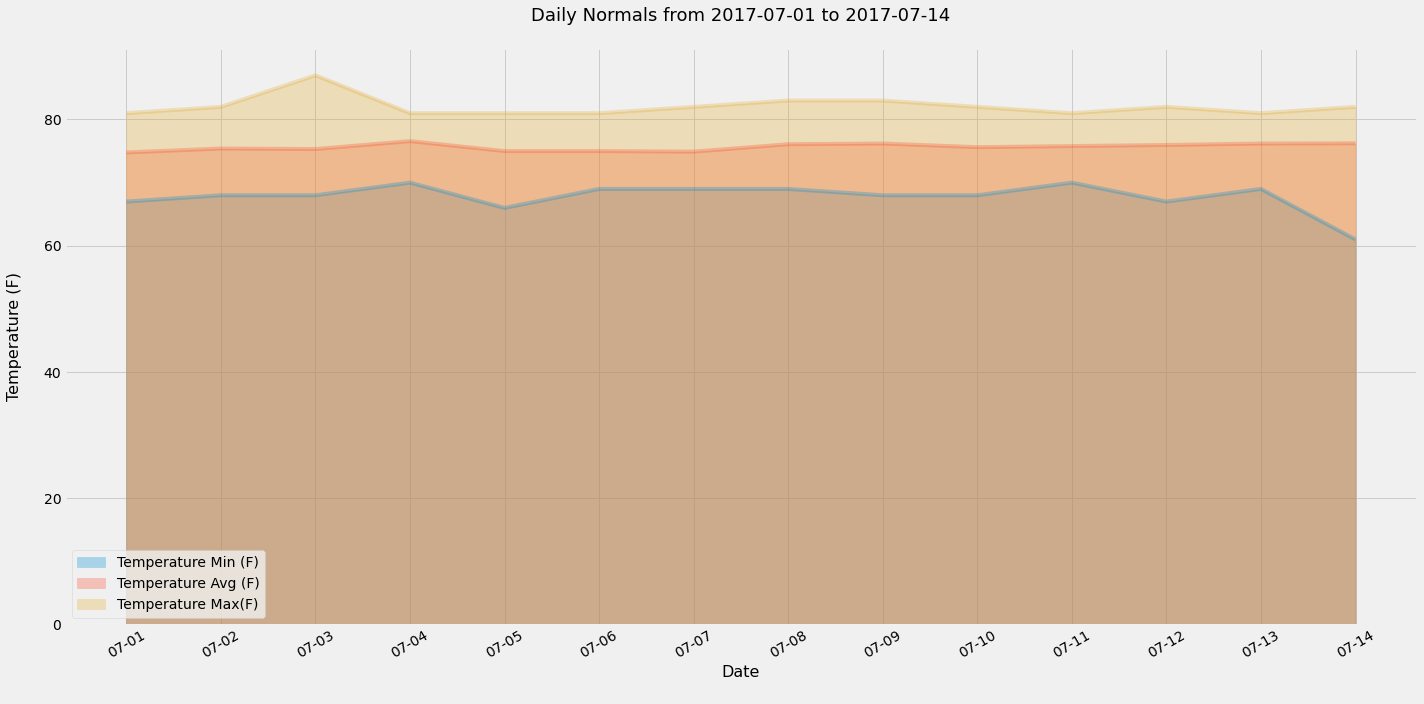

In [206]:
# Plot the daily normals as an area plot with `stacked=False`
dailynormals_df.plot.area(figsize=(20,10), stacked=False, alpha = 0.3, rot=30, fontsize=14)
plt.xticks(np.arange(len(trip_dates)), labels=trip_dates)
plt.title(f"Daily Normals from {start_date} to {end_date}\n", fontsize=18)
plt.xlabel("Date\n", fontsize=16)
plt.ylabel("Temperature (F)\n", fontsize=16)
plt.tight_layout()
plt.savefig("Images/dailynormals.png",bbox_inches = 'tight')
plt.show()